In [18]:
import pandas as pd
import numpy as np

coefficients = [6,13,16]
skip_files_df = pd.read_csv('results/jana_gana_mana_results.csv')
skip_files = skip_files_df['Filename'].tolist()

all_features = []

for i in range(1, 117):
    file_name = f'{i:02d}-MFCC.csv'
        
    if file_name in skip_files:
        continue
    
    file_name = 'data/' + file_name
    
    df = pd.read_csv(file_name, header=None).T
    
    features = {'file_name': file_name}

    for coeff in coefficients:
        features[f'C{coeff}_mean'] = df[coeff].mean()
        features[f'C{coeff}_std'] = df[coeff].std()
        features[f'C{coeff}_skewness'] = df[coeff].skew()
        features[f'C{coeff}_kurtosis'] = df[coeff].kurtosis()
        features[f'C{coeff}_range'] = df[coeff].max() - df[coeff].min()
        features[f'C{coeff}_autocorr'] = df[coeff].autocorr(lag=1)

        fft_coeffs = np.fft.fft(df[coeff])
        fft_magnitude = np.abs(fft_coeffs)
        
        features[f'C{coeff}_fft_mean'] = fft_magnitude.mean()
        features[f'C{coeff}_fft_std'] = fft_magnitude.std()
        features[f'C{coeff}_fft_max'] = fft_magnitude.max()
        features[f'C{coeff}_fft_min'] = fft_magnitude.min()
        features[f'C{coeff}_fft_skewness'] = pd.Series(fft_magnitude).skew()
        features[f'C{coeff}_fft_kurtosis'] = pd.Series(fft_magnitude).kurtosis()
        
        features[f'C{coeff}_fft_peak'] = np.argmax(fft_magnitude)
        features[f'C{coeff}_fft_energy'] = np.sum(fft_magnitude ** 2)

    features_df = pd.DataFrame(features, index=[0])
    all_features.append(features_df)

final_features_df = pd.concat(all_features, ignore_index=True)


In [19]:
final_features_df

,file_name,C6_mean,C6_std,C6_skewness,C6_kurtosis,C6_range,C6_autocorr,C6_fft_mean,C6_fft_std,C6_fft_max,...,C16_range,C16_autocorr,C16_fft_mean,C16_fft_std,C16_fft_max,C16_fft_min,C16_fft_skewness,C16_fft_kurtosis,C16_fft_peak,C16_fft_energy
0,data/03-MFCC.csv,-11.553235,15.077688,-0.154759,0.225726,119.842041,0.919471,1162.081435,2734.610626,282696.113228,...,83.325782,0.829503,702.841051,975.465354,54307.766355,4.589569,12.500217,456.596543,0,3.537038e+10
1,data/04-MFCC.csv,-16.879980,18.913559,0.122115,-0.454217,118.083153,0.946323,1060.175139,3339.319051,322424.499672,...,101.956929,0.955033,774.191565,2011.080492,141290.365483,0.787897,26.218233,1404.933359,0,8.870155e+10
2,data/05-MFCC.csv,-1.486453,10.910300,0.423827,0.346679,93.131134,0.924962,771.892506,1401.951359,59912.432600,...,67.650157,0.895737,618.735261,1340.745762,142179.924154,2.406088,57.571344,5893.599402,0,4.606382e+10
3,data/06-MFCC.csv,-15.062285,15.466639,-0.171656,0.050094,112.238677,0.947451,1271.220891,3625.384179,476977.391689,...,99.702354,0.938700,985.982295,2013.082038,134916.926288,1.199782,16.639184,725.604976,0,1.591159e+11
4,data/07-MFCC.csv,5.514648,12.940727,-0.111737,-0.238522,88.391853,0.938525,811.956923,1699.481425,98872.130506,...,82.213492,0.917121,619.944139,1037.200005,25459.864454,0.293183,7.075678,83.243295,0,2.617839e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,data/112-MFCC.csv,-0.049661,19.538056,-0.100562,-0.372691,135.665895,0.968229,993.756920,2356.997658,56363.252859,...,98.565880,0.933270,756.361703,1326.149384,21594.044814,0.901551,6.049102,55.909957,2,3.995148e+10
97,data/113-MFCC.csv,-13.115446,14.582556,0.351603,0.621381,130.478675,0.941629,1146.684056,3090.522508,370498.247505,...,120.876786,0.950829,899.013134,1937.621762,97492.183858,2.632943,12.915945,352.897308,0,1.288890e+11
98,data/114-MFCC.csv,-9.315157,12.998789,-0.323569,-0.213097,99.157354,0.930534,951.580987,2588.495264,277042.080293,...,58.860420,0.882002,701.259925,1022.086598,22369.560250,0.761180,6.052435,64.840715,8,4.569486e+10
99,data/115-MFCC.csv,-3.116604,14.967296,-0.253766,0.302454,113.252312,0.962596,966.250679,2254.475832,91793.918093,...,90.070742,0.968351,837.959082,2143.771237,69825.469711,2.280748,14.266574,328.282991,5,1.363740e+11


In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = final_features_df.drop(columns=['file_name'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PCA 01', 'PCA 02'])

In [21]:
pca_df['file_name'] = final_features_df['file_name']

In [22]:
pca_df

,PCA 01,PCA 02,file_name
0,-1.131224,-0.132876,data/03-MFCC.csv
1,3.122249,0.478013,data/04-MFCC.csv
2,-4.201222,-0.338030,data/05-MFCC.csv
3,4.911422,4.701907,data/06-MFCC.csv
4,-1.531345,-2.745571,data/07-MFCC.csv
...,...,...,...
96,2.514803,-3.294913,data/112-MFCC.csv
97,4.506509,1.737522,data/113-MFCC.csv
98,-1.224811,-0.023325,data/114-MFCC.csv
99,4.610014,-2.440776,data/115-MFCC.csv


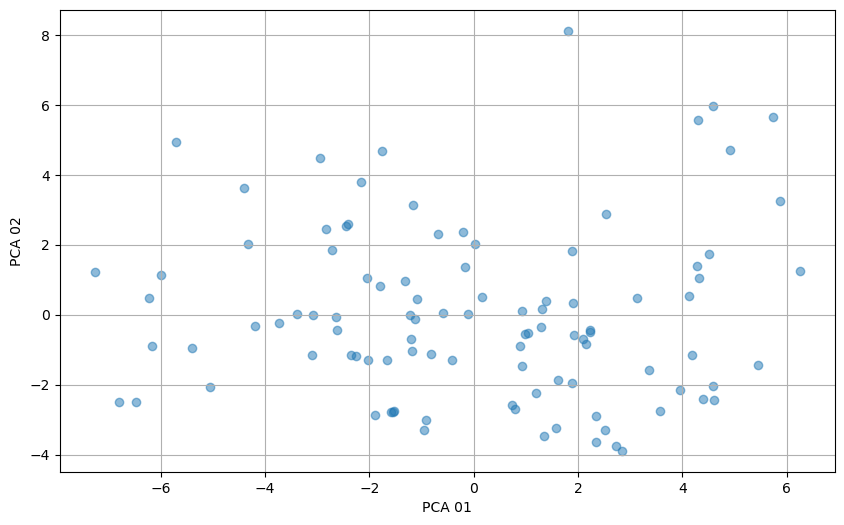

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA 01'], pca_df['PCA 02'], alpha=0.5)
plt.xlabel('PCA 01')
plt.ylabel('PCA 02')
plt.grid(True)
plt.show()

DBSCAN Silhouette Score: -0.161
Agglomerative Clustering Silhouette Score: 0.403
GMM Silhouette Score: 0.365


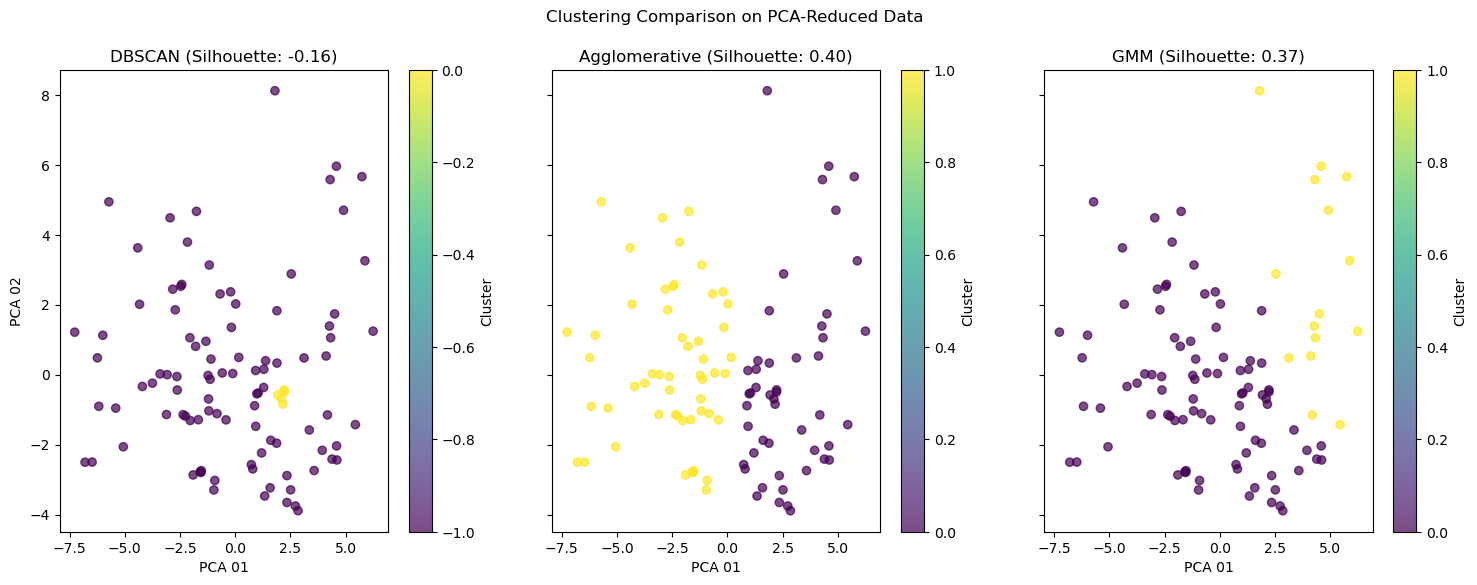

In [24]:
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

clusters = 2


dbscan = DBSCAN(eps=0.5, min_samples=5)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_df[['PCA 01', 'PCA 02']])
dbscan_silhouette = silhouette_score(pca_df[['PCA 01', 'PCA 02']], pca_df['DBSCAN_Cluster'])

agglo = AgglomerativeClustering(n_clusters=clusters)
pca_df['Agglo_Cluster'] = agglo.fit_predict(pca_df[['PCA 01', 'PCA 02']])
agglo_silhouette = silhouette_score(pca_df[['PCA 01', 'PCA 02']], pca_df['Agglo_Cluster'])

gmm = GaussianMixture(n_components=clusters, random_state=42)
pca_df['GMM_Cluster'] = gmm.fit_predict(pca_df[['PCA 01', 'PCA 02']])
gmm_silhouette = silhouette_score(pca_df[['PCA 01', 'PCA 02']], pca_df['GMM_Cluster'])

print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.3f}")
print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.3f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
fig.suptitle('Clustering Comparison on PCA-Reduced Data')

scatter1 = axes[0].scatter(pca_df['PCA 01'], pca_df['PCA 02'], c=pca_df['DBSCAN_Cluster'], cmap='viridis', alpha=0.7)
axes[0].set_title(f'DBSCAN (Silhouette: {dbscan_silhouette:.2f})')
axes[0].set_xlabel('PCA 01')
axes[0].set_ylabel('PCA 02')
fig.colorbar(scatter1, ax=axes[0], label='Cluster')

scatter2 = axes[1].scatter(pca_df['PCA 01'], pca_df['PCA 02'], c=pca_df['Agglo_Cluster'], cmap='viridis', alpha=0.7)
axes[1].set_title(f'Agglomerative (Silhouette: {agglo_silhouette:.2f})')
axes[1].set_xlabel('PCA 01')
fig.colorbar(scatter2, ax=axes[1], label='Cluster')

scatter3 = axes[2].scatter(pca_df['PCA 01'], pca_df['PCA 02'], c=pca_df['GMM_Cluster'], cmap='viridis', alpha=0.7)
axes[2].set_title(f'GMM (Silhouette: {gmm_silhouette:.2f})')
axes[2].set_xlabel('PCA 01')
fig.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.show()

In [26]:
pca_df[pca_df['DBSCAN_Cluster'] ==0]

,PCA 01,PCA 02,file_name,DBSCAN_Cluster,Agglo_Cluster,GMM_Cluster
32,2.225727,-0.492868,data/40-MFCC.csv,0,0,0
39,2.102415,-0.690168,data/47-MFCC.csv,0,0,0
61,2.223143,-0.435372,data/70-MFCC.csv,0,0,0
81,2.156261,-0.845266,data/94-MFCC.csv,0,0,0
88,1.930389,-0.581130,data/102-MFCC.csv,0,0,0
